# Imports and Setup

In [3]:

import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import random
import torch

# Add src to path to import modules
sys.path.append(os.path.abspath(os.path.join('..')))

from src import config
from src.train_phase1 import run_phase1
from src.phase1_utils import compute_and_save_importance, create_consensus_mask, get_param_names
from src.visualization import plot_matrix
from src.train_phase2 import run_phase2_lodo
from src.models import FeedForwardHead

# --- Reproducibility ---
random.seed(config.SEED)
np.random.seed(config.SEED)
torch.manual_seed(config.SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(config.SEED)

print("Setup complete. Using config:")
print(f"  - Device: {config.DEVICE}")
print(f"  - Domains: {config.DOMAINS}")
print(f"  - Phase 1 Domains for Importance: {config.PH1_DOMAINS}")

Using device: cuda
Setup complete. Using config:
  - Device: cuda
  - Domains: ['art_painting', 'cartoon', 'photo', 'sketch']
  - Phase 1 Domains for Importance: ['art_painting', 'cartoon', 'photo']


# Running Phase 1

In [2]:
# This will take some time to run. It trains 3 separate models.
run_phase1()

--- Starting Phase 1 Training ---
Saved initial shared weights to ../results\phase1_weights\initial

--- Training on domain: art_painting ---
Randomly selected class: 5
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Domain art_painting | Epoch 1 | Avg Loss: 2.6769


Epoch 2/10: 100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


Domain art_painting | Epoch 2 | Avg Loss: 2.5812


Epoch 3/10: 100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


Domain art_painting | Epoch 3 | Avg Loss: 2.4921


Epoch 4/10: 100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


Domain art_painting | Epoch 4 | Avg Loss: 2.3863


Epoch 5/10: 100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


Domain art_painting | Epoch 5 | Avg Loss: 2.2988


Epoch 6/10: 100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


Domain art_painting | Epoch 6 | Avg Loss: 2.2058


Epoch 7/10: 100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


Domain art_painting | Epoch 7 | Avg Loss: 2.0778


Epoch 8/10: 100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


Domain art_painting | Epoch 8 | Avg Loss: 2.0116


Epoch 9/10: 100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


Domain art_painting | Epoch 9 | Avg Loss: 1.8842


Epoch 10/10: 100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


Domain art_painting | Epoch 10 | Avg Loss: 1.8086
Saved final weights for domain art_painting to ../results\phase1_weights\final\domain_art_painting

--- Training on domain: cartoon ---
Randomly selected class: 0
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 13/13 [00:00<00:00, 13.75it/s]


Domain cartoon | Epoch 1 | Avg Loss: 2.2249


Epoch 2/10: 100%|██████████| 13/13 [00:00<00:00, 13.55it/s]


Domain cartoon | Epoch 2 | Avg Loss: 2.1107


Epoch 3/10: 100%|██████████| 13/13 [00:00<00:00, 13.69it/s]


Domain cartoon | Epoch 3 | Avg Loss: 1.9737


Epoch 4/10: 100%|██████████| 13/13 [00:00<00:00, 13.68it/s]


Domain cartoon | Epoch 4 | Avg Loss: 1.8787


Epoch 5/10: 100%|██████████| 13/13 [00:00<00:00, 13.93it/s]


Domain cartoon | Epoch 5 | Avg Loss: 1.7739


Epoch 6/10: 100%|██████████| 13/13 [00:00<00:00, 13.68it/s]


Domain cartoon | Epoch 6 | Avg Loss: 1.6516


Epoch 7/10: 100%|██████████| 13/13 [00:00<00:00, 13.70it/s]


Domain cartoon | Epoch 7 | Avg Loss: 1.5263


Epoch 8/10: 100%|██████████| 13/13 [00:00<00:00, 13.78it/s]


Domain cartoon | Epoch 8 | Avg Loss: 1.4457


Epoch 9/10: 100%|██████████| 13/13 [00:00<00:00, 13.72it/s]


Domain cartoon | Epoch 9 | Avg Loss: 1.3248


Epoch 10/10: 100%|██████████| 13/13 [00:00<00:00, 13.65it/s]


Domain cartoon | Epoch 10 | Avg Loss: 1.2281
Saved final weights for domain cartoon to ../results\phase1_weights\final\domain_cartoon

--- Training on domain: photo ---
Randomly selected class: 0
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 6/6 [00:00<00:00, 13.05it/s]


Domain photo | Epoch 1 | Avg Loss: 2.2474


Epoch 2/10: 100%|██████████| 6/6 [00:00<00:00, 13.09it/s]


Domain photo | Epoch 2 | Avg Loss: 2.2247


Epoch 3/10: 100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Domain photo | Epoch 3 | Avg Loss: 2.1388


Epoch 4/10: 100%|██████████| 6/6 [00:00<00:00, 12.73it/s]


Domain photo | Epoch 4 | Avg Loss: 2.0514


Epoch 5/10: 100%|██████████| 6/6 [00:00<00:00, 13.05it/s]


Domain photo | Epoch 5 | Avg Loss: 2.0548


Epoch 6/10: 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]


Domain photo | Epoch 6 | Avg Loss: 1.9215


Epoch 7/10: 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Domain photo | Epoch 7 | Avg Loss: 1.8917


Epoch 8/10: 100%|██████████| 6/6 [00:00<00:00, 13.14it/s]


Domain photo | Epoch 8 | Avg Loss: 1.8453


Epoch 9/10: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]


Domain photo | Epoch 9 | Avg Loss: 1.7988


Epoch 10/10: 100%|██████████| 6/6 [00:00<00:00, 12.76it/s]

Domain photo | Epoch 10 | Avg Loss: 1.7702
Saved final weights for domain photo to ../results\phase1_weights\final\domain_photo

--- Phase 1 Training Complete ---


# Compute Importance and Create Consensus Masks

In [3]:
# Instantiate a temporary model to get parameter names
ffn_temp = FeedForwardHead(config.EMBEDDING_DIM)
param_names = get_param_names(ffn_temp)

# 1. Compute per-domain importance
for domain in config.PH1_DOMAINS:
    print(f"\nComputing importance for domain: {domain}")
    for name in param_names:
        compute_and_save_importance(domain, name)

# 2. Create consensus masks
print("\nCreating consensus masks...")
for name in param_names:
    create_consensus_mask(name, domains=config.PH1_DOMAINS)

print("\nImportance and consensus masks generated successfully.")


Computing importance for domain: art_painting

Computing importance for domain: cartoon

Computing importance for domain: photo

Creating consensus masks...
Created consensus mask for layers.0.weight
Created consensus mask for layers.0.bias
Created consensus mask for layers.1.weight
Created consensus mask for layers.1.bias
Created consensus mask for layers.2.weight
Created consensus mask for layers.2.bias
Created consensus mask for layers.3.weight
Created consensus mask for layers.3.bias
Created consensus mask for classifier.weight
Created consensus mask for classifier.bias

Importance and consensus masks generated successfully.


# Visualize Weights and Importance Masks

In [ ]:
# # In a new notebook cell

# import os
# import numpy as np
# from IPython.display import display, Image

# # Make sure you've imported everything needed
# from src import config
# from src.models import FeedForwardHead
# from src.phase1_utils import get_param_names
# # Add the new function to your imports
# from src.visualization import create_graph_from_matrices 


# # --- Helper function to load all .npy files for a model ---
# def load_all_params(directory, param_names, suffix=".npy"):
#     """Loads all parameter matrices from a directory into a dictionary."""
#     loaded_params = {}
#     for name in param_names:
#         filename = name.replace('.', '_') + suffix
#         filepath = os.path.join(directory, filename)
#         if os.path.exists(filepath):
#             loaded_params[name] = np.load(filepath)
#     return loaded_params

# # --- Main Visualization Script ---

# # 1. Get the list of parameter names
# ffn_temp = FeedForwardHead(config.EMBEDDING_DIM)
# param_names = get_param_names(ffn_temp)
# print("Found parameter names:", param_names)

# # 2. Visualize Initial Shared Weights
# print("\n--- Generating graph for Initial Weights ---")
# initial_weights_dir = os.path.join(config.PHASE1_WEIGHTS_DIR, "initial")
# initial_params = load_all_params(initial_weights_dir, param_names)
# create_graph_from_matrices(
#     initial_params,
#     title="Initial Shared Network Weights",
#     save_path=os.path.join(config.PLOTS_DIR, "graphs", "0_initial_weights.png")
# )

# # 3. Loop through each domain to visualize its specific matrices
# for domain in config.PH1_DOMAINS:
#     print(f"\n--- Generating graphs for domain: {domain} ---")
    
#     # a. Final Weights (after training)
#     final_weights_dir = os.path.join(config.PHASE1_WEIGHTS_DIR, "final", f"domain_{domain}")
#     final_params = load_all_params(final_weights_dir, param_names)
#     create_graph_from_matrices(
#         final_params,
#         title=f"Final Weights - Domain: {domain}",
#         save_path=os.path.join(config.PLOTS_DIR, "graphs", f"1_final_weights_{domain}.png")
#     )
    
#     # b. Importance Matrix (Absolute Difference)
#     importance_dir = os.path.join(config.PHASE1_IMPORTANCE_DIR, f"domain_{domain}")
#     importance_norm_params = load_all_params(importance_dir, param_names, suffix="_norm.npy")
#     create_graph_from_matrices(
#         importance_norm_params,
#         title=f"Normalized Importance - Domain: {domain}",
#         save_path=os.path.join(config.PLOTS_DIR, "graphs", f"2_importance_norm_{domain}.png")
#     )
    
#     # c. Binary Importance Mask
#     importance_binary_params = load_all_params(importance_dir, param_names, suffix="_binary.npy")
#     create_graph_from_matrices(
#         importance_binary_params,
#         title=f"Binary Importance Mask - Domain: {domain}",
#         save_path=os.path.join(config.PLOTS_DIR, "graphs", f"3_importance_binary_{domain}.png"),
#         highlight_binary=True  # Use special styling for 0s and 1s
#     )

# # 4. Visualize the final Consensus Mask
# print("\n--- Generating graph for Consensus Mask ---")
# consensus_dir = os.path.join(config.PHASE1_IMPORTANCE_DIR, "consensus")
# consensus_binary_params = load_all_params(consensus_dir, param_names, suffix="_binary.npy")
# create_graph_from_matrices(
#     consensus_binary_params,
#     title="Consensus Binary Mask",
#     save_path=os.path.join(config.PLOTS_DIR, "graphs", "4_consensus_binary_mask.png"),
#     highlight_binary=True
# )

# print("\n\n--- All graphs generated successfully! ---")

# # --- Display a few key examples ---
# print("\nInitial Shared Network:")
# display(Image(filename=os.path.join(config.PLOTS_DIR, "graphs", "0_initial_weights.png")))

# print("\nBinary Importance Mask for 'art_painting':")
# display(Image(filename=os.path.join(config.PLOTS_DIR, "graphs", "3_importance_binary_art_painting.png")))

# print("\nFinal Consensus Mask:")
# display(Image(filename=os.path.join(config.PLOTS_DIR, "graphs", "4_consensus_binary_mask.png")))

e:\Fatim\LUMS\SPROJ\Codes\Visual Reasoning\Visual-Reasoning\WeightImportanceDG\src\config.py:13: SyntaxWarning: invalid escape sequence '\H'
  DATA_ROOT = 'D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data'


Using device: cpu


ModuleNotFoundError: No module named 'transformers'

Displaying Consensus Binary Mask for 'layers.0.weight':


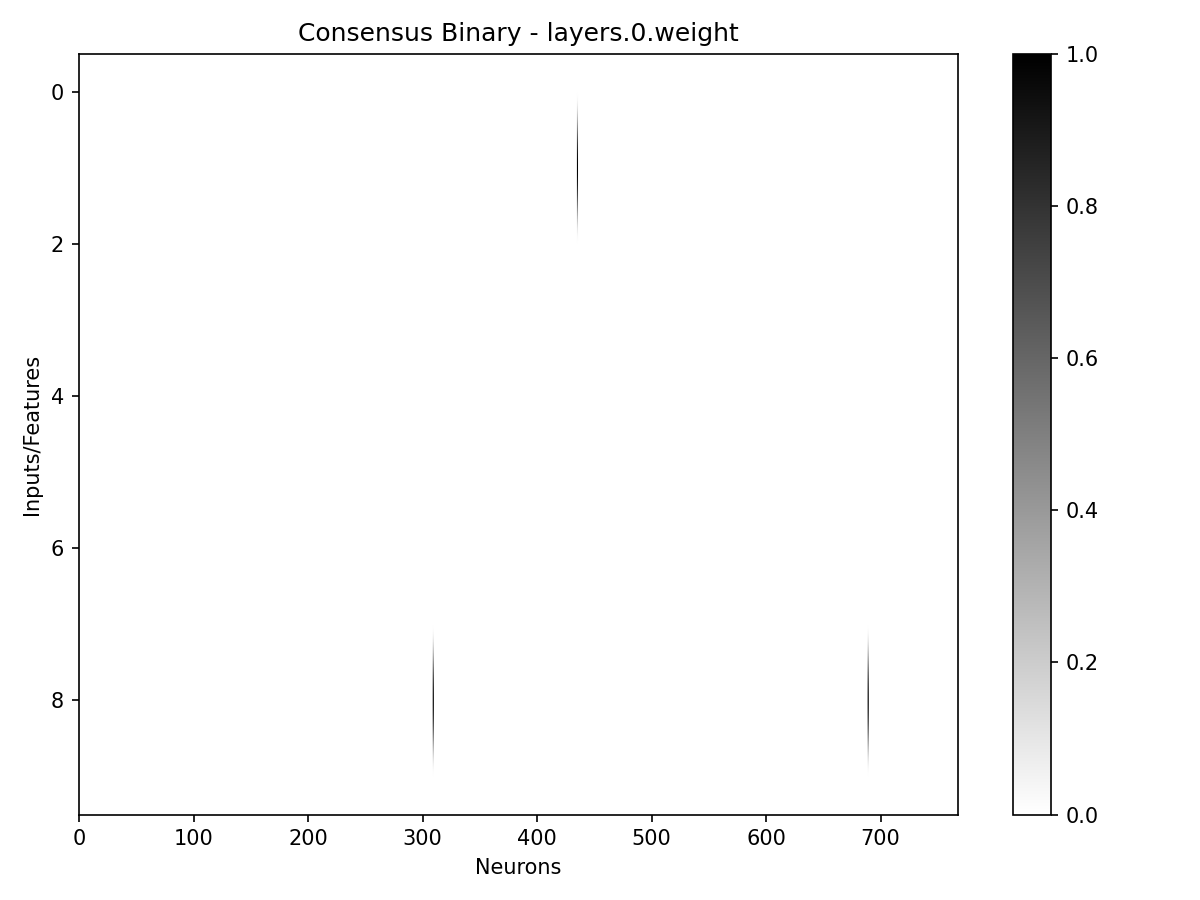

In [4]:
def visualize_all(param_name):
    filename_base = param_name.replace('.', '_')
    
    # --- Visualize Initial and Final Weights ---
    initial_w = np.load(os.path.join(config.PHASE1_WEIGHTS_DIR, "initial", f"{filename_base}.npy"))
    plot_matrix(initial_w, 
                os.path.join(config.PLOTS_DIR, "initial", f"{filename_base}.png"), 
                f"Initial Shared - {param_name}")
    
    for domain in config.PH1_DOMAINS:
        final_w = np.load(os.path.join(config.PHASE1_WEIGHTS_DIR, "final", f"domain_{domain}", f"{filename_base}.npy"))
        plot_matrix(final_w, 
                    os.path.join(config.PLOTS_DIR, f"final_{domain}", f"{filename_base}.png"), 
                    f"Final {domain} - {param_name}")

    # --- Visualize Importance Masks (Norm and Binary) ---
    for domain in config.PH1_DOMAINS:
        norm_mask = np.load(os.path.join(config.PHASE1_IMPORTANCE_DIR, f"domain_{domain}", f"{filename_base}_norm.npy"))
        binary_mask = np.load(os.path.join(config.PHASE1_IMPORTANCE_DIR, f"domain_{domain}", f"{filename_base}_binary.npy"))
        
        plot_matrix(norm_mask, os.path.join(config.PLOTS_DIR, f"importance_{domain}", f"{filename_base}_norm.png"), 
                    f"Importance Norm {domain} - {param_name}", vmin=0, vmax=1)
        plot_matrix(binary_mask, os.path.join(config.PLOTS_DIR, f"importance_{domain}", f"{filename_base}_binary.png"),
                    f"Importance Binary {domain} - {param_name}", cmap='gray_r', vmin=0, vmax=1)

    # --- Visualize Consensus Masks ---
    consensus_norm = np.load(os.path.join(config.PHASE1_IMPORTANCE_DIR, "consensus", f"{filename_base}_norm.npy"))
    consensus_binary = np.load(os.path.join(config.PHASE1_IMPORTANCE_DIR, "consensus", f"{filename_base}_binary.npy"))

    plot_matrix(consensus_norm, os.path.join(config.PLOTS_DIR, "consensus", f"{filename_base}_norm.png"),
                f"Consensus Norm - {param_name}", vmin=0, vmax=1)
    plot_matrix(consensus_binary, os.path.join(config.PLOTS_DIR, "consensus", f"{filename_base}_binary.png"),
                f"Consensus Binary - {param_name}", cmap='gray_r', vmin=0, vmax=1)

# Generate plots for the first hidden layer weight as an example
example_param = 'layers.0.weight'
visualize_all(example_param)

# Display the final consensus mask for inspection
print(f"Displaying Consensus Binary Mask for '{example_param}':")
display(Image(filename=os.path.join(config.PLOTS_DIR, "consensus", f"{example_param.replace('.', '_')}_binary.png")))

# Run Phase 2 LODO Training

In [5]:
lodo_results = {}

for test_domain in config.DOMAINS:
    train_domains = [d for d in config.DOMAINS if d != test_domain]
    
    test_accuracy = run_phase2_lodo(train_domains, test_domain)
    lodo_results[test_domain] = test_accuracy


--- Starting Phase 2 LODO ---
Training on: ['cartoon', 'photo', 'sketch'], Testing on: art_painting
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 199/199 [00:59<00:00,  3.34it/s]


Epoch 1 | Train Loss: 1.8514 | Val Acc: 0.4267 | Non-Imp Scale: 1.00


Epoch 2/10: 100%|██████████| 199/199 [00:15<00:00, 12.78it/s]


Epoch 2 | Train Loss: 1.6097 | Val Acc: 0.4519 | Non-Imp Scale: 0.86


Epoch 3/10: 100%|██████████| 199/199 [00:15<00:00, 12.84it/s]


Epoch 3 | Train Loss: 1.4724 | Val Acc: 0.5160 | Non-Imp Scale: 0.71


Epoch 4/10: 100%|██████████| 199/199 [00:15<00:00, 12.85it/s]


Epoch 4 | Train Loss: 1.3772 | Val Acc: 0.6595 | Non-Imp Scale: 0.57


Epoch 5/10: 100%|██████████| 199/199 [00:15<00:00, 12.85it/s]


Epoch 5 | Train Loss: 1.3095 | Val Acc: 0.6772 | Non-Imp Scale: 0.43


Epoch 6/10: 100%|██████████| 199/199 [00:15<00:00, 12.84it/s]


Epoch 6 | Train Loss: 1.2262 | Val Acc: 0.7017 | Non-Imp Scale: 0.29


Epoch 7/10: 100%|██████████| 199/199 [00:15<00:00, 12.86it/s]


Epoch 7 | Train Loss: 1.1465 | Val Acc: 0.7369 | Non-Imp Scale: 0.14


Epoch 8/10: 100%|██████████| 199/199 [00:15<00:00, 12.84it/s]


Epoch 8 | Train Loss: 1.1303 | Val Acc: 0.7269 | Non-Imp Scale: 0.00


Epoch 9/10: 100%|██████████| 199/199 [00:15<00:00, 12.84it/s]


Epoch 9 | Train Loss: 1.0981 | Val Acc: 0.7426 | Non-Imp Scale: 0.00


Epoch 10/10: 100%|██████████| 199/199 [00:15<00:00, 12.85it/s]


Epoch 10 | Train Loss: 1.0870 | Val Acc: 0.7407 | Non-Imp Scale: 0.00
--- Final Test Accuracy on art_painting: 0.5756 ---

--- Starting Phase 2 LODO ---
Training on: ['art_painting', 'photo', 'sketch'], Testing on: cartoon
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 192/192 [00:20<00:00,  9.38it/s]


Epoch 1 | Train Loss: 1.7714 | Val Acc: 0.5059 | Non-Imp Scale: 1.00


Epoch 2/10: 100%|██████████| 192/192 [00:14<00:00, 12.83it/s]


Epoch 2 | Train Loss: 1.4876 | Val Acc: 0.7275 | Non-Imp Scale: 0.86


Epoch 3/10: 100%|██████████| 192/192 [00:15<00:00, 12.15it/s]


Epoch 3 | Train Loss: 1.2789 | Val Acc: 0.7719 | Non-Imp Scale: 0.71


Epoch 4/10: 100%|██████████| 192/192 [00:15<00:00, 12.24it/s]


Epoch 4 | Train Loss: 1.1342 | Val Acc: 0.8209 | Non-Imp Scale: 0.57


Epoch 5/10: 100%|██████████| 192/192 [00:15<00:00, 12.28it/s]


Epoch 5 | Train Loss: 1.0626 | Val Acc: 0.8340 | Non-Imp Scale: 0.43


Epoch 6/10: 100%|██████████| 192/192 [00:15<00:00, 12.63it/s]


Epoch 6 | Train Loss: 1.0345 | Val Acc: 0.8536 | Non-Imp Scale: 0.29


Epoch 7/10: 100%|██████████| 192/192 [00:14<00:00, 12.84it/s]


Epoch 7 | Train Loss: 0.9578 | Val Acc: 0.8686 | Non-Imp Scale: 0.14


Epoch 8/10: 100%|██████████| 192/192 [00:15<00:00, 12.79it/s]


Epoch 8 | Train Loss: 0.9344 | Val Acc: 0.8693 | Non-Imp Scale: 0.00


Epoch 9/10: 100%|██████████| 192/192 [00:14<00:00, 12.83it/s]


Epoch 9 | Train Loss: 0.9556 | Val Acc: 0.8608 | Non-Imp Scale: 0.00


Epoch 10/10: 100%|██████████| 192/192 [00:14<00:00, 12.86it/s]


Epoch 10 | Train Loss: 0.9250 | Val Acc: 0.8719 | Non-Imp Scale: 0.00
--- Final Test Accuracy on cartoon: 0.6525 ---

--- Starting Phase 2 LODO ---
Training on: ['art_painting', 'cartoon', 'sketch'], Testing on: photo
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 208/208 [00:16<00:00, 12.81it/s]


Epoch 1 | Train Loss: 1.8307 | Val Acc: 0.5039 | Non-Imp Scale: 1.00


Epoch 2/10: 100%|██████████| 208/208 [00:16<00:00, 12.83it/s]


Epoch 2 | Train Loss: 1.5918 | Val Acc: 0.6468 | Non-Imp Scale: 0.86


Epoch 3/10: 100%|██████████| 208/208 [00:16<00:00, 12.83it/s]


Epoch 3 | Train Loss: 1.3821 | Val Acc: 0.7093 | Non-Imp Scale: 0.71


Epoch 4/10: 100%|██████████| 208/208 [00:16<00:00, 12.83it/s]


Epoch 4 | Train Loss: 1.2619 | Val Acc: 0.7562 | Non-Imp Scale: 0.57


Epoch 5/10: 100%|██████████| 208/208 [00:16<00:00, 12.84it/s]


Epoch 5 | Train Loss: 1.1680 | Val Acc: 0.7544 | Non-Imp Scale: 0.43


Epoch 6/10: 100%|██████████| 208/208 [00:16<00:00, 12.80it/s]


Epoch 6 | Train Loss: 1.1305 | Val Acc: 0.7688 | Non-Imp Scale: 0.29


Epoch 7/10: 100%|██████████| 208/208 [00:16<00:00, 12.78it/s]


Epoch 7 | Train Loss: 1.0627 | Val Acc: 0.7748 | Non-Imp Scale: 0.14


Epoch 8/10: 100%|██████████| 208/208 [00:16<00:00, 12.80it/s]


Epoch 8 | Train Loss: 1.0465 | Val Acc: 0.7724 | Non-Imp Scale: 0.00


Epoch 9/10: 100%|██████████| 208/208 [00:16<00:00, 12.83it/s]


Epoch 9 | Train Loss: 1.0477 | Val Acc: 0.7760 | Non-Imp Scale: 0.00


Epoch 10/10: 100%|██████████| 208/208 [00:16<00:00, 12.79it/s]


Epoch 10 | Train Loss: 1.0448 | Val Acc: 0.8348 | Non-Imp Scale: 0.00
--- Final Test Accuracy on photo: 0.8982 ---

--- Starting Phase 2 LODO ---
Training on: ['art_painting', 'cartoon', 'photo'], Testing on: sketch
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data
self.dataroot: D:\Haseeb\SPROJ\PACS ViT\pacs_data\pacs_data


Epoch 1/10: 100%|██████████| 152/152 [00:11<00:00, 12.71it/s]


Epoch 1 | Train Loss: 1.6979 | Val Acc: 0.5647 | Non-Imp Scale: 1.00


Epoch 2/10: 100%|██████████| 152/152 [00:11<00:00, 12.70it/s]


Epoch 2 | Train Loss: 1.3929 | Val Acc: 0.6092 | Non-Imp Scale: 0.86


Epoch 3/10: 100%|██████████| 152/152 [00:11<00:00, 12.70it/s]


Epoch 3 | Train Loss: 1.2257 | Val Acc: 0.6381 | Non-Imp Scale: 0.71


Epoch 4/10: 100%|██████████| 152/152 [00:11<00:00, 12.74it/s]


Epoch 4 | Train Loss: 1.1169 | Val Acc: 0.7139 | Non-Imp Scale: 0.57


Epoch 5/10: 100%|██████████| 152/152 [00:11<00:00, 12.69it/s]


Epoch 5 | Train Loss: 1.0526 | Val Acc: 0.7181 | Non-Imp Scale: 0.43


Epoch 6/10: 100%|██████████| 152/152 [00:11<00:00, 12.70it/s]


Epoch 6 | Train Loss: 1.0086 | Val Acc: 0.7279 | Non-Imp Scale: 0.29


Epoch 7/10: 100%|██████████| 152/152 [00:11<00:00, 12.69it/s]


Epoch 7 | Train Loss: 0.9414 | Val Acc: 0.7271 | Non-Imp Scale: 0.14


Epoch 8/10: 100%|██████████| 152/152 [00:11<00:00, 12.70it/s]


Epoch 8 | Train Loss: 0.9231 | Val Acc: 0.7659 | Non-Imp Scale: 0.00


Epoch 9/10: 100%|██████████| 152/152 [00:11<00:00, 12.72it/s]


Epoch 9 | Train Loss: 0.8983 | Val Acc: 0.7675 | Non-Imp Scale: 0.00


Epoch 10/10: 100%|██████████| 152/152 [00:11<00:00, 12.77it/s]


Epoch 10 | Train Loss: 0.8892 | Val Acc: 0.7758 | Non-Imp Scale: 0.00
--- Final Test Accuracy on sketch: 0.2061 ---


# Final Results Summary

--- LODO Final Results ---
  - Accuracy on held-out 'art_painting': 0.5756
  - Accuracy on held-out 'cartoon': 0.6525
  - Accuracy on held-out 'photo': 0.8982
  - Accuracy on held-out 'sketch': 0.2061

Average LODO Accuracy: 0.5831


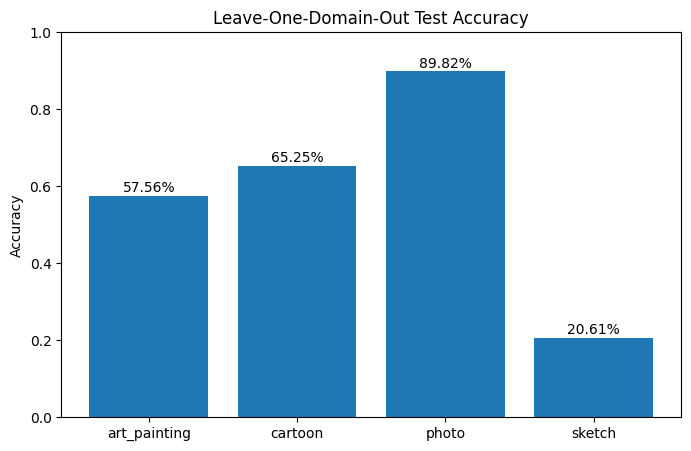

In [ ]:
print("--- LODO Final Results ---")
total_acc = 0
for domain, acc in lodo_results.items():
    print(f"  - Accuracy on held-out '{domain}': {acc:.4f}")
    total_acc += acc

avg_acc = total_acc / len(lodo_results)
print(f"\nAverage LODO Accuracy: {avg_acc:.4f}")

# You can also create a plot here if you wish
plt.figure(figsize=(8, 5))
plt.bar(lodo_results.keys(), lodo_results.values())
plt.ylabel("Accuracy")
plt.title("Leave-One-Domain-Out Test Accuracy")
plt.ylim(0, 1)
for i, (domain, acc) in enumerate(lodo_resul+ts.items()):
    plt.text(i, acc + 0.01, f"{acc:.2%}", ha='center')
plt.show()